<a href="https://colab.research.google.com/github/juanganb1/IA/blob/main/Tarea2_IA_02_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
df = pd.read_csv("toy_dataset2.csv")
dfa = np.array(df)
filtro = np.array([False,True,True,True,True,False])
data = dfa[:,filtro]



target = dfa[:,5]
target = float(target)
# print (target)
database = np.concatenate((data, target.reshape(150000,1)), axis = 1)
print(database)

database_df = pd.DataFrame(database, columns = ('City' , 'Gender', 'Age', 'Income', 'Illness'))
database_df.head(n=150000)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
def normaliza_dataset(x):
  min = np.min(x, axis = 0)
  max = np.max(x, axis = 0)
  # print(min)
  # print(max)
  new_min = 0
  new_max = 1.0

  for i in range(0, x.shape[1]):
    x[i:, i] = ((x[i:, i] - min[i]) / (max[i] - min[i])) * (new_max - new_min)
    # print(x[i:, i])
  return x

def one_hot_encoder(y):
  encoded = np.zeros((y.shape[0], 3))

  for i, n in enumerate(y):
    encoded[i, n] = 1
    print(encoded)
  return encoded


x = normaliza_dataset(data)
y = one_hot_encoder(target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#print(x_train.shape[0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def FeedForward():
  model = Sequential()

  model.add(Dense(20, input_shape = (13,)))
  model.add(Activation('relu'))
  model.add(Dense (20, activation = 'relu'))
  model.add(Dense(3))
  model.add(Activation('softmax'))

  model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['acc'])

  return model

model = FeedForward()

history = model.fit(x_train, y_train, batch_size = 70, epochs = 2500, validation_data = (x_test, y_test), verbose=2)
#1/1 - 0s - loss: 0.4340 - acc: 0.9000 - val_loss: 0.5506 - val_acc: 0.8000 - 40ms/epoch - 40ms/step
#1/1 - 0s - loss: 0.2284 - acc: 0.9750 - val_loss: 0.3993 - val_acc: 0.8667 - 60ms/epoch - 60ms/step

Epoch 1/2500
3/3 - 1s - loss: 1.0246 - acc: 0.5282 - val_loss: 1.0502 - val_acc: 0.4167 - 938ms/epoch - 313ms/step
Epoch 2/2500
3/3 - 0s - loss: 1.0208 - acc: 0.5493 - val_loss: 1.0485 - val_acc: 0.4167 - 37ms/epoch - 12ms/step
Epoch 3/2500
3/3 - 0s - loss: 1.0189 - acc: 0.5634 - val_loss: 1.0466 - val_acc: 0.4167 - 34ms/epoch - 11ms/step
Epoch 4/2500
3/3 - 0s - loss: 1.0159 - acc: 0.5704 - val_loss: 1.0441 - val_acc: 0.4167 - 54ms/epoch - 18ms/step
Epoch 5/2500
3/3 - 0s - loss: 1.0129 - acc: 0.5845 - val_loss: 1.0416 - val_acc: 0.4167 - 37ms/epoch - 12ms/step
Epoch 6/2500
3/3 - 0s - loss: 1.0095 - acc: 0.5915 - val_loss: 1.0395 - val_acc: 0.4444 - 34ms/epoch - 11ms/step
Epoch 7/2500
3/3 - 0s - loss: 1.0064 - acc: 0.6197 - val_loss: 1.0377 - val_acc: 0.4444 - 39ms/epoch - 13ms/step
Epoch 8/2500
3/3 - 0s - loss: 1.0034 - acc: 0.6408 - val_loss: 1.0360 - val_acc: 0.4444 - 36ms/epoch - 12ms/step
Epoch 9/2500
3/3 - 0s - loss: 1.0007 - acc: 0.6479 - val_loss: 1.0341 - val_acc: 0.4444 - 36ms

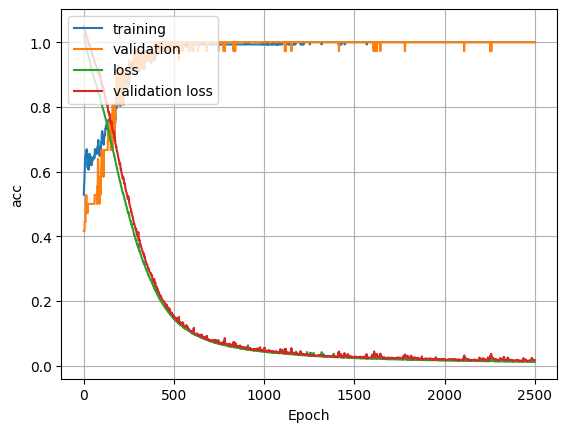

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(['training','validation','loss','validation loss'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
sample_x, sample_y = x_test[0], y_test[0]

pred = model.predict(sample_x.reshape(1,13))

pred = np.argmax(pred)
print(sample_x, sample_y, pred)


1/1 [==============================] - 0s 156ms/step
[0.31315789 0.10869565 0.31016043 0.43298969 0.23913043 0.47586207
 0.35864979 0.49056604 0.52681388 0.12116041 0.30894309 0.64102564
 0.02425107] [0. 1. 0.] 1
